### ЗАДАНИЕ 1

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
from sklearn.datasets import load_boston

In [103]:
boston = load_boston()
boston.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [124]:
data = boston.data
target = boston.target
feature = boston.feature_names
feature

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [105]:
x = pd.DataFrame(data,columns=feature)


In [106]:
y = pd.DataFrame(target,columns=['price'])

### РАЗБИТИЕ ДАННЫХ НА ТРЕНИРОВОЧНЫЙ И ТЕСТОВЫЙ ДАТАСЕТ

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size=0.2, random_state=42) 

### МАСШТАБИРОВАНИЕ ПРИЗНАКОВ

In [108]:
from sklearn.preprocessing import StandardScaler


In [109]:
scaler = StandardScaler()

In [110]:
x_test_scaler = pd.DataFrame(scaler.fit_transform(x_test), columns = feature)

In [111]:
x_train_scaler = pd.DataFrame(scaler.fit_transform(x_train),columns = feature)

### Модель TSNE

In [112]:
from sklearn.manifold import TSNE

In [113]:
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42) 

In [114]:
x_train_tsne = tsne.fit_transform(x_train_scaler)
x_train_tsne

array([[ 17.645624  ,  28.406218  ],
       [  1.6133794 , -11.563689  ],
       [-14.5985    , -16.157717  ],
       [ 27.65398   ,  24.220755  ],
       [  3.8739002 ,  -9.40449   ],
       [ -2.0326433 , -15.587415  ],
       [ -0.48839292, -14.178003  ],
       [-23.318121  , -13.778156  ],
       [ 27.593517  ,  25.564125  ],
       [ 24.52684   ,  24.971394  ],
       [ -0.4837361 , -14.802191  ],
       [ -4.706522  ,  -6.1135483 ],
       [ -7.6053567 ,  -2.4791708 ],
       [ 25.225407  ,  24.14793   ],
       [ -9.633202  ,  -3.0656078 ],
       [  9.137457  ,  -6.7359676 ],
       [  2.062477  ,  -6.3994236 ],
       [-15.625919  , -16.7226    ],
       [-10.261498  , -14.384683  ],
       [-10.831577  , -18.551825  ],
       [ 23.060835  ,  28.409035  ],
       [  0.7136497 ,  -3.6644816 ],
       [ -3.6749017 , -16.457159  ],
       [ -0.679544  , -11.812288  ],
       [-23.207016  , -14.088349  ],
       [ -6.919917  ,  -2.852082  ],
       [  0.6825832 ,  11.351543  ],
 

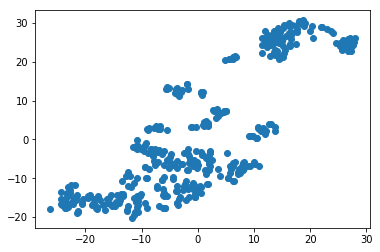

In [115]:
plt.scatter(x_train_tsne[:,0],x_train_tsne[:,1])

### ЗАДАНИЕ 2

In [118]:
from sklearn.cluster import KMeans

In [119]:
kmeans = KMeans(n_clusters = 3)

In [120]:
cluster_train = kmeans.fit_predict(x_train_scaler)

In [121]:
pd.value_counts(cluster_train)

0    191
1    127
2     86
dtype: int64

In [122]:
cluster_test = kmeans.fit_predict(x_test_scaler)

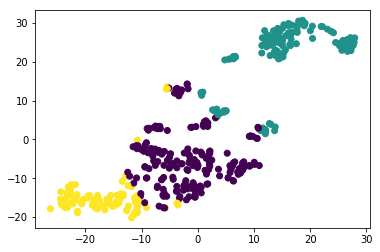

In [123]:
plt.scatter(x_train_tsne[:,0],x_train_tsne[:,1], c = cluster_train )

In [126]:
x_train.loc[cluster_train==0, 'CRIM'].mean()

0.42166020942408367

In [127]:
x_train.loc[cluster_train==1, 'CRIM'].mean()

10.797028425196853

In [128]:
x_train.loc[cluster_train==2, 'CRIM'].mean()

0.07356558139534886

In [130]:
y_train[cluster_train==0].mean()

price    24.958115
dtype: float64

In [133]:
y_train[cluster_train==1].mean()

price    16.165354
dtype: float64

In [132]:
y_train[cluster_train==2].mean()

price    27.788372
dtype: float64